## Imports

In [ ]:
!pip install sentence_transformers
!pip install torch_geometric

In [ ]:
from dataset_dataloader import IMCAG, GraphDataLoader
from GCN import GCN
from sklearn import metrics
import warnings
import numpy as np
import random

from tqdm.auto import tqdm
import os
import torch
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

In [ ]:
random.seed(42)

## Load dataset

In [ ]:
dataset = IMCAG('data/')
dataset = dataset.shuffle()

In [ ]:
train_size = int(len(dataset) * 0.8)
train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

In [ ]:
train_loader = GraphDataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=torch.cuda.is_available())
test_loader = GraphDataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=torch.cuda.is_available())

In [ ]:
if torch.cuda.is_available():
    dev = "cuda"
else:
    dev = "cpu"

device = torch.device(dev)

In [ ]:
def train():
    model.train()
    loss_sum = 0

    for i, data in enumerate(tqdm(train_loader)):
        optimizer.zero_grad()
        data = data.to(device)
        out = model(data)
        loss = criterion(out, data.y)
        loss_sum += loss.item() * len(data)
        loss.backward()
        optimizer.step()
        
    return  loss_sum / len(train_loader.sampler)

In [ ]:
def test(report_dict=True):
    model.eval()
    loss_sum, acc_sum = 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for i, data in enumerate(tqdm(test_loader)):
            data = data.to(device)
            out = model(data)

            loss = criterion(out, data.y)
            loss_sum += loss.item() * len(data)

            pred = out.argmax(dim=1)
            y_true.append(data.y)
            y_pred.append(pred)
            acc_sum += int((pred == data.y).sum())

    y_true, y_pred = torch.hstack(y_true).to('cpu'), torch.hstack(y_pred).to('cpu')
    report = metrics.classification_report(y_true, y_pred, output_dict=report_dict)
    cm = confusion_matrix(y_true, y_pred)
    return loss_sum / len(test_loader.sampler), acc_sum / len(test_loader.sampler), report, cm

## Models

### GCN

In [ ]:
model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 10
train_losses = []
test_losses = []
test_accs = []

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss = train()
    train_losses.append(train_loss)

    test_loss, test_acc, report = test()
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    print(report)
    print()

  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 001, Train loss: 0.3612, Test loss: 0.2938, Test Acc: 0.8903
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     17538
           1       0.80      0.87      0.83      8070

    accuracy                           0.89     25608
   macro avg       0.87      0.88      0.88     25608
weighted avg       0.89      0.89      0.89     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 002, Train loss: 0.3060, Test loss: 0.2752, Test Acc: 0.8804
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     17538
           1       0.77      0.88      0.82      8070

    accuracy                           0.88     25608
   macro avg       0.86      0.88      0.87     25608
weighted avg       0.89      0.88      0.88     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 003, Train loss: 0.2643, Test loss: 0.2050, Test Acc: 0.9019
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     17538
           1       0.82      0.89      0.85      8070

    accuracy                           0.90     25608
   macro avg       0.88      0.90      0.89     25608
weighted avg       0.91      0.90      0.90     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 004, Train loss: 0.2027, Test loss: 0.1827, Test Acc: 0.8987
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     17538
           1       0.80      0.91      0.85      8070

    accuracy                           0.90     25608
   macro avg       0.88      0.90      0.89     25608
weighted avg       0.91      0.90      0.90     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 005, Train loss: 0.1773, Test loss: 0.1537, Test Acc: 0.9052
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     17538
           1       0.79      0.94      0.86      8070

    accuracy                           0.91     25608
   macro avg       0.88      0.92      0.90     25608
weighted avg       0.92      0.91      0.91     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 006, Train loss: 0.1630, Test loss: 0.1519, Test Acc: 0.9074
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     17538
           1       0.80      0.95      0.87      8070

    accuracy                           0.91     25608
   macro avg       0.89      0.92      0.90     25608
weighted avg       0.92      0.91      0.91     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 007, Train loss: 0.1562, Test loss: 0.1429, Test Acc: 0.9098
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     17538
           1       0.89      0.82      0.85      8070

    accuracy                           0.91     25608
   macro avg       0.90      0.89      0.89     25608
weighted avg       0.91      0.91      0.91     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 008, Train loss: 0.1473, Test loss: 0.1347, Test Acc: 0.9102
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     17538
           1       0.82      0.92      0.87      8070

    accuracy                           0.91     25608
   macro avg       0.89      0.91      0.90     25608
weighted avg       0.92      0.91      0.91     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 009, Train loss: 0.1429, Test loss: 0.1456, Test Acc: 0.9071
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     17538
           1       0.78      0.98      0.87      8070

    accuracy                           0.91     25608
   macro avg       0.89      0.93      0.90     25608
weighted avg       0.92      0.91      0.91     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 010, Train loss: 0.1396, Test loss: 0.1328, Test Acc: 0.9119
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     17538
           1       0.80      0.96      0.87      8070

    accuracy                           0.91     25608
   macro avg       0.89      0.92      0.90     25608
weighted avg       0.92      0.91      0.91     25608




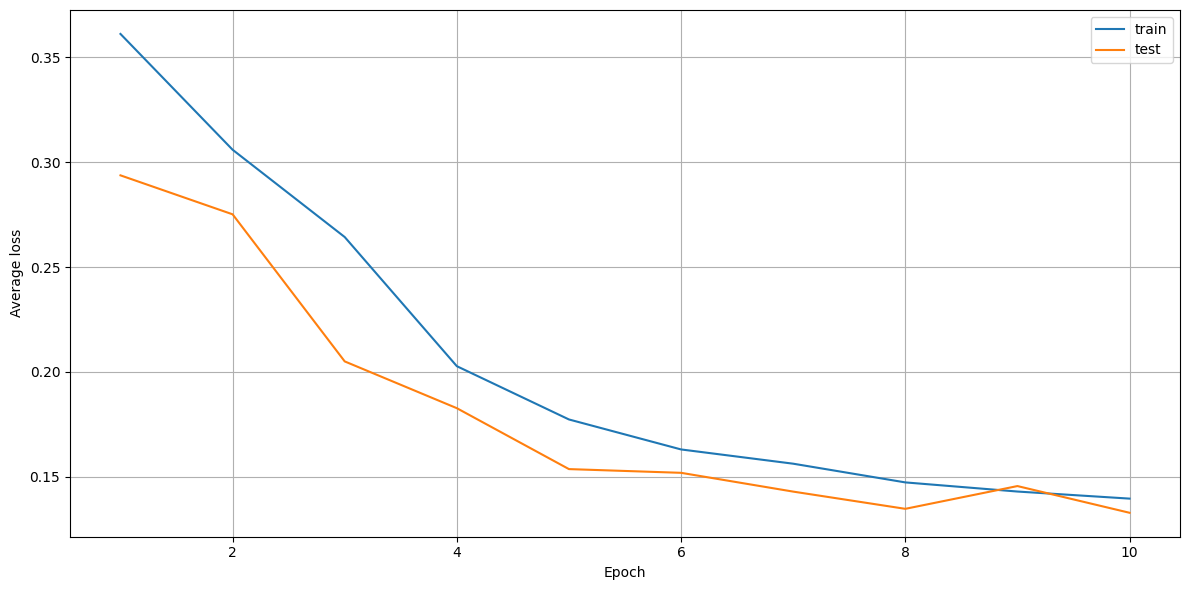

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="train")
plt.plot(range(1, len(test_losses) + 1), test_losses, label="test")
plt.xlabel("Epoch")
plt.ylabel("Average loss")
plt.legend()
plt.grid()
plt.savefig('GCN_10epochs.png')
plt.tight_layout()
plt.show()

In [ ]:
state = {
    'epoch': epoch,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict(),
    'train_losses': train_losses,
    'test_losses': test_losses,
    'test_accuracy': test_accs
}
torch.save(state, 'GCN_10epochs.pt')

### FeaStNet

In [ ]:
from FeaStNet import FeaStNet

In [ ]:
model = FeaStNet(384, 2, 1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 10
train_losses = []
test_losses = []
test_accs = []

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss = train()
    train_losses.append(train_loss)

    test_loss, test_acc, report = test()
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    print(report)
    print()

  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 001, Train loss: 0.4489, Test loss: 0.4214, Test Acc: 0.8590
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     17538
           1       0.74      0.86      0.79      8070

    accuracy                           0.86     25608
   macro avg       0.83      0.86      0.84     25608
weighted avg       0.87      0.86      0.86     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 002, Train loss: 0.3837, Test loss: 0.3523, Test Acc: 0.8691
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     17538
           1       0.74      0.90      0.81      8070

    accuracy                           0.87     25608
   macro avg       0.84      0.88      0.86     25608
weighted avg       0.88      0.87      0.87     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 003, Train loss: 0.3553, Test loss: 0.3465, Test Acc: 0.8571
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     17538
           1       0.72      0.90      0.80      8070

    accuracy                           0.86     25608
   macro avg       0.83      0.87      0.84     25608
weighted avg       0.88      0.86      0.86     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 004, Train loss: 0.3469, Test loss: 0.3343, Test Acc: 0.8874
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     17538
           1       0.80      0.86      0.83      8070

    accuracy                           0.89     25608
   macro avg       0.87      0.88      0.87     25608
weighted avg       0.89      0.89      0.89     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 005, Train loss: 0.3384, Test loss: 0.3011, Test Acc: 0.9001
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     17538
           1       0.81      0.90      0.85      8070

    accuracy                           0.90     25608
   macro avg       0.88      0.90      0.89     25608
weighted avg       0.91      0.90      0.90     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 006, Train loss: 0.3119, Test loss: 0.3004, Test Acc: 0.9053
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     17538
           1       0.81      0.92      0.86      8070

    accuracy                           0.91     25608
   macro avg       0.88      0.91      0.89     25608
weighted avg       0.91      0.91      0.91     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 007, Train loss: 0.3050, Test loss: 0.2957, Test Acc: 0.9058
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     17538
           1       0.80      0.94      0.86      8070

    accuracy                           0.91     25608
   macro avg       0.88      0.91      0.90     25608
weighted avg       0.92      0.91      0.91     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 008, Train loss: 0.3046, Test loss: 0.2916, Test Acc: 0.9023
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     17538
           1       0.81      0.89      0.85      8070

    accuracy                           0.90     25608
   macro avg       0.88      0.90      0.89     25608
weighted avg       0.91      0.90      0.90     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 009, Train loss: 0.3001, Test loss: 0.2895, Test Acc: 0.8995
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     17538
           1       0.81      0.88      0.85      8070

    accuracy                           0.90     25608
   macro avg       0.88      0.90      0.89     25608
weighted avg       0.90      0.90      0.90     25608




  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 010, Train loss: 0.2970, Test loss: 0.2885, Test Acc: 0.8826
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     17538
           1       0.74      0.96      0.84      8070

    accuracy                           0.88     25608
   macro avg       0.86      0.90      0.87     25608
weighted avg       0.90      0.88      0.89     25608




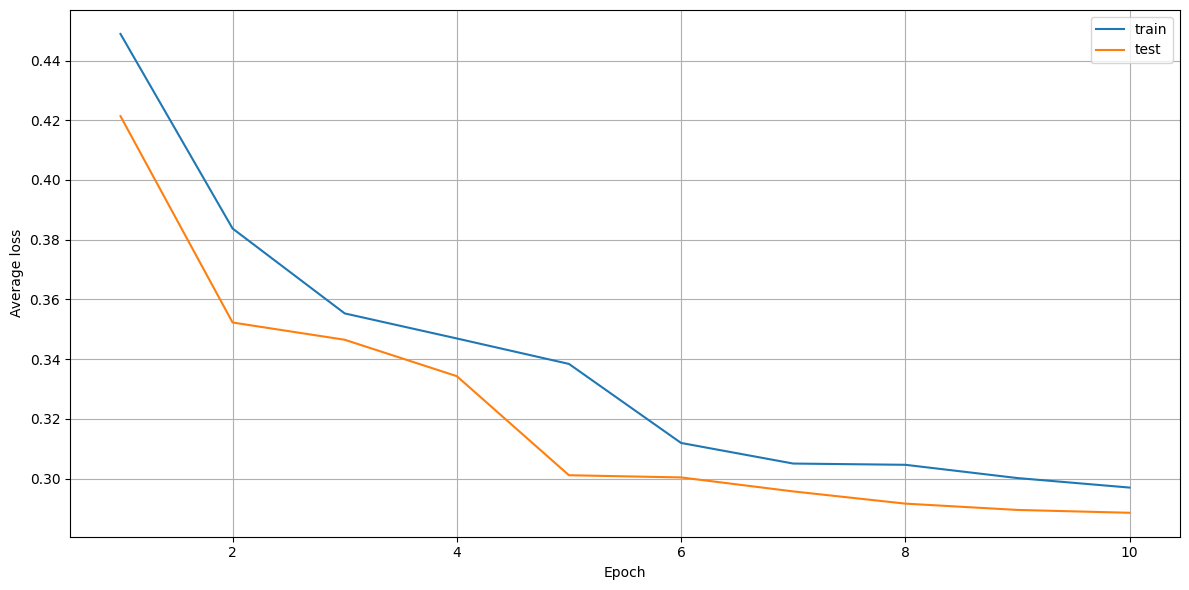

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="train")
plt.plot(range(1, len(test_losses) + 1), test_losses, label="test")
plt.xlabel("Epoch")
plt.ylabel("Average loss")
plt.legend()
plt.grid()
plt.savefig('FeaStNet_10epochs.png')
plt.tight_layout()
plt.show()

In [ ]:
state = {
    'epoch': epoch,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict(),
    'train_losses': train_losses,
    'test_losses': test_losses,
    'test_accuracy': test_accs
}
torch.save(state, 'FeaStNet_10epochs.pt')

### ARMAConv

In [ ]:
import ARMAConv
from ARMAConv import ARMAConv

In [ ]:
model = ARMAConv(in_dim=384,
                hid_dim=128,
                out_dim=2,
                num_stacks=2,
                num_layers=2,
                dropout=0.2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 10
train_losses = []
test_losses = []
test_accs = []
reports = []
cms = []

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss = train()
    train_losses.append(train_loss)

    test_loss, test_acc, report, cm = test()
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    reports.append(report)
    cms.append(cm)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    print(report)
    print()

  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 001, Train loss: 0.3099, Test loss: 0.2430, Test Acc: 0.9092
{'0': {'precision': 0.9584380555385276, 'recall': 0.9046985302627011, 'f1-score': 0.9307932728084536, 'support': 17282}, '1': {'precision': 0.8228079612694997, 'recall': 0.9185683401393226, 'f1-score': 0.868055161455082, 'support': 8326}, 'accuracy': 0.9092080599812559, 'macro avg': {'precision': 0.8906230084040136, 'recall': 0.9116334352010118, 'f1-score': 0.8994242171317678, 'support': 25608}, 'weighted avg': {'precision': 0.9143402671566185, 'recall': 0.9092080599812559, 'f1-score': 0.9103950568162569, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 002, Train loss: 0.2424, Test loss: 0.2302, Test Acc: 0.9045
{'0': {'precision': 0.9780885480440807, 'recall': 0.8781969679435251, 'f1-score': 0.9254550443611087, 'support': 17282}, '1': {'precision': 0.79139827569121, 'recall': 0.9591640643766515, 'f1-score': 0.8672422218602379, 'support': 8326}, 'accuracy': 0.9045220243673852, 'macro avg': {'precision': 0.8847434118676454, 'recall': 0.9186805161600883, 'f1-score': 0.8963486331106734, 'support': 25608}, 'weighted avg': {'precision': 0.9173894224735558, 'recall': 0.9045220243673852, 'f1-score': 0.9065281480731421, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 003, Train loss: 0.2353, Test loss: 0.2249, Test Acc: 0.9103
{'0': {'precision': 0.9634463137060861, 'recall': 0.9013424372179146, 'f1-score': 0.9313602391629299, 'support': 17282}, '1': {'precision': 0.819385593220339, 'recall': 0.9290175354311795, 'f1-score': 0.8707643814026793, 'support': 8326}, 'accuracy': 0.9103405185879413, 'macro avg': {'precision': 0.8914159534632126, 'recall': 0.9151799863245471, 'f1-score': 0.9010623102828046, 'support': 25608}, 'weighted avg': {'precision': 0.9166074524609935, 'recall': 0.9103405185879413, 'f1-score': 0.9116585400176687, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 004, Train loss: 0.2315, Test loss: 0.2256, Test Acc: 0.9070
{'0': {'precision': 0.9696186574219982, 'recall': 0.8901168846198356, 'f1-score': 0.928168461700908, 'support': 17282}, '1': {'precision': 0.8050908344452428, 'recall': 0.942109055969253, 'f1-score': 0.8682273507111629, 'support': 8326}, 'accuracy': 0.9070212433614495, 'macro avg': {'precision': 0.8873547459336204, 'recall': 0.9161129702945443, 'f1-score': 0.8981979062060355, 'support': 25608}, 'weighted avg': {'precision': 0.9161252704294777, 'recall': 0.9070212433614495, 'f1-score': 0.9086796421874506, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 005, Train loss: 0.2319, Test loss: 0.2250, Test Acc: 0.9082
{'0': {'precision': 0.9478641708663307, 'recall': 0.9141881726652008, 'f1-score': 0.9307216494845361, 'support': 17282}, '1': {'precision': 0.8341163310961969, 'recall': 0.8956281527744415, 'f1-score': 0.8637785242673462, 'support': 8326}, 'accuracy': 0.9081537019681349, 'macro avg': {'precision': 0.8909902509812637, 'recall': 0.9049081627198212, 'f1-score': 0.8972500868759412, 'support': 25608}, 'weighted avg': {'precision': 0.9108810205255726, 'recall': 0.9081537019681349, 'f1-score': 0.9089562456826648, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 006, Train loss: 0.2286, Test loss: 0.2293, Test Acc: 0.9052
{'0': {'precision': 0.9800917846293065, 'recall': 0.8773868765189214, 'f1-score': 0.9258999175648033, 'support': 17282}, '1': {'precision': 0.7909637959948703, 'recall': 0.9630074465529667, 'f1-score': 0.868547906624059, 'support': 8326}, 'accuracy': 0.9052249297094658, 'macro avg': {'precision': 0.8855277903120884, 'recall': 0.9201971615359441, 'f1-score': 0.8972239120944312, 'support': 25608}, 'weighted avg': {'precision': 0.9186000776092222, 'recall': 0.9052249297094658, 'f1-score': 0.9072528993246972, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 007, Train loss: 0.2287, Test loss: 0.2171, Test Acc: 0.9090
{'0': {'precision': 0.9551848018023503, 'recall': 0.9077074412683717, 'f1-score': 0.930841121495327, 'support': 17282}, '1': {'precision': 0.8263473053892215, 'recall': 0.9116022099447514, 'f1-score': 0.8668836731197533, 'support': 8326}, 'accuracy': 0.9089737582005624, 'macro avg': {'precision': 0.890766053595786, 'recall': 0.9096548256065615, 'f1-score': 0.8988623973075403, 'support': 25608}, 'weighted avg': {'precision': 0.9132955095836799, 'recall': 0.9089737582005624, 'f1-score': 0.910046459078308, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 008, Train loss: 0.2257, Test loss: 0.2157, Test Acc: 0.9117
{'0': {'precision': 0.9778583699179233, 'recall': 0.889306793195232, 'f1-score': 0.9314827722052182, 'support': 17282}, '1': {'precision': 0.8065918511778385, 'recall': 0.9582032188325726, 'f1-score': 0.8758851622111216, 'support': 8326}, 'accuracy': 0.9117072789753202, 'macro avg': {'precision': 0.8922251105478809, 'recall': 0.9237550060139024, 'f1-score': 0.9036839672081699, 'support': 25608}, 'weighted avg': {'precision': 0.9221740120988845, 'recall': 0.9117072789753202, 'f1-score': 0.9134061672063566, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 009, Train loss: 0.2254, Test loss: 0.2155, Test Acc: 0.9092
{'0': {'precision': 0.9387467730579676, 'recall': 0.9258187709755815, 'f1-score': 0.9322379537376916, 'support': 17282}, '1': {'precision': 0.8503035964502569, 'recall': 0.874609656497718, 'f1-score': 0.8622853759621077, 'support': 8326}, 'accuracy': 0.9091690096844736, 'macro avg': {'precision': 0.8945251847541122, 'recall': 0.9002142137366498, 'f1-score': 0.8972616648498997, 'support': 25608}, 'weighted avg': {'precision': 0.9099909979706591, 'recall': 0.9091690096844736, 'f1-score': 0.9094940782862893, 'support': 25608}}



  0%|          | 0/1601 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Epoch: 010, Train loss: 0.2242, Test loss: 0.2186, Test Acc: 0.9102
{'0': {'precision': 0.9639539204756596, 'recall': 0.9005902094664969, 'f1-score': 0.9311954050496589, 'support': 17282}, '1': {'precision': 0.818431621221729, 'recall': 0.9300984866682681, 'f1-score': 0.8706993478749719, 'support': 8326}, 'accuracy': 0.9101843174008123, 'macro avg': {'precision': 0.8911927708486943, 'recall': 0.9153443480673825, 'f1-score': 0.9009473764623155, 'support': 25608}, 'weighted avg': {'precision': 0.9166398520756195, 'recall': 0.9101843174008123, 'f1-score': 0.9115261543453305, 'support': 25608}}



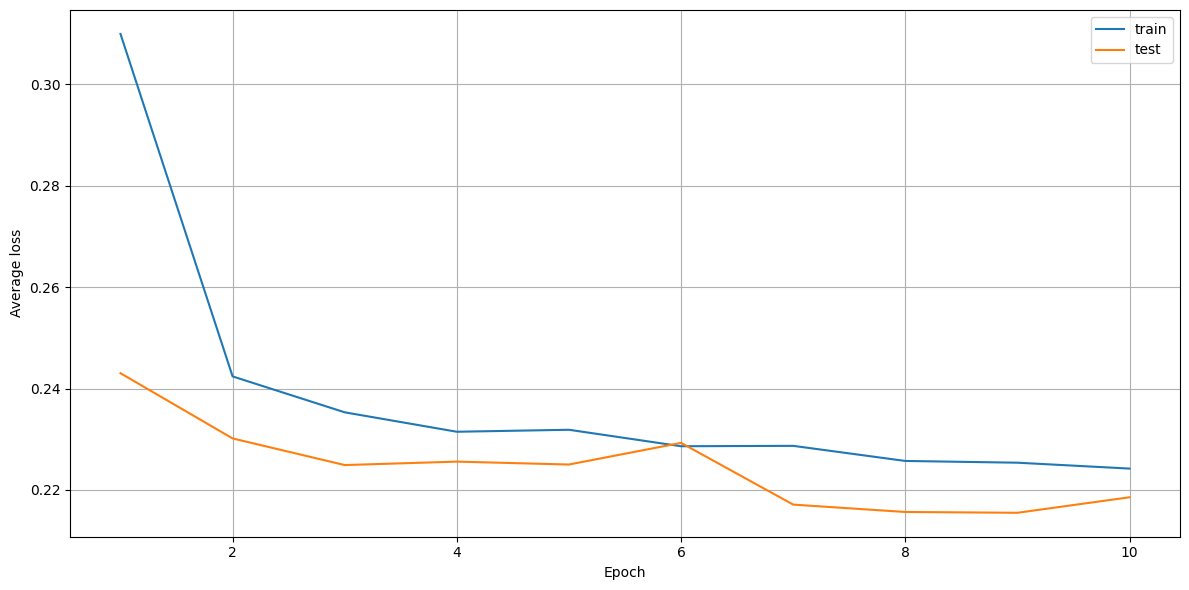

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="train")
plt.plot(range(1, len(test_losses) + 1), test_losses, label="test")
plt.xlabel("Epoch")
plt.ylabel("Average loss")
plt.legend()
plt.grid()
plt.savefig('ARMA_10epochs.png')
plt.tight_layout()
plt.show()

In [ ]:
state = {
    'epoch': epoch,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict(),
    'train_losses': train_losses,
    'test_losses': test_losses,
    'test_accuracy': test_accs,
    'reports':reports, 
    'conf_matrix':cms
}
torch.save(state, 'ARMA_10epochs.pt')

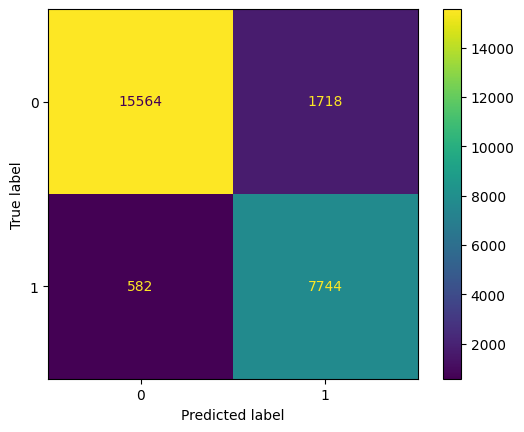

In [ ]:
cm_display = ConfusionMatrixDisplay(cms[-1]).plot()

## Summary

In [ ]:
index = ['FeaStNet', 'ARMAConv', 'GCN']
accuracy = [88.3, 91.0, 91.2]
precision = [74.0,81.8, 80.0]
recall = [96.0,93.0, 96.0 ]
F1 = [84.0,87.1,87.0]

In [ ]:
d = {'Accuracy':accuracy, 'Precision':precision, 'Recall': recall, 'F1':F1}
df = pd.DataFrame(data=d, index=index)

In [ ]:
df

,Accuracy,Precision,Recall,F1
FeaStNet,88.3,74.0,96.0,84.0
ARMAConv,91.0,81.8,93.0,87.1
GCN,91.2,80.0,96.0,87.0
